In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import visuals as vs

from sklearn.utils import shuffle, class_weight
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV

import matplotlib.pyplot as plt
import seaborn as sns

random_state = 6
np.random.seed(random_state)

/usr/local/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [2]:
## look data with pandas
train_file = "data/rupturemodel_train.txt"
val_file = "data/rupturemodel_xvalidate.txt"
test_file = "data/rupturemodel_test.txt"

df_train= pd.read_csv(train_file, sep=" ", header = None)
df_val= pd.read_csv(val_file, sep=" ", header = None)
df_test= pd.read_csv(test_file, sep=" ", header = None)

coloumns =  ['height', 'width', 'sxx', 'sxy', 'syy', 'sdrop', 'mud', 'dc', 'label']
df_train.columns = coloumns
df_val.columns = coloumns
df_test.columns = coloumns

frames = [df_train, df_val]
df_train = pd.concat(frames)
print('train data shape {} and test data shape {}'.format(np.shape(df_train), np.shape(df_test)))

train data shape (1600, 9) and test data shape (400, 9)


In [3]:
df_train.head(5)

,height,width,sxx,sxy,syy,sdrop,mud,dc,label
0,0.103861,1.145663,-102.509086,58.619371,-117.766562,0.483821,0.216681,0.295842,0.0
1,0.088714,1.304360,-136.062270,51.391037,-126.715571,0.345944,0.447964,0.406466,1.0
2,0.099706,1.260377,-117.558936,40.972081,-115.529343,0.292719,0.501697,0.389360,1.0
3,0.115749,1.191782,-128.169036,94.020712,-157.830504,0.571710,0.202831,0.408976,0.0
4,0.017900,1.108150,-106.350320,29.148969,-101.379323,0.253122,0.324653,0.398592,1.0


In [4]:
mms = StandardScaler()
X_train = mms.fit_transform(df_train.drop('label', axis=1))
Y_train = df_train['label'].values
X_test = mms.fit_transform(df_test.drop('label', axis=1))
Y_test = df_test['label'].values

In [5]:
df_train.head(5)

,height,width,sxx,sxy,syy,sdrop,mud,dc,label
0,0.103861,1.145663,-102.509086,58.619371,-117.766562,0.483821,0.216681,0.295842,0.0
1,0.088714,1.304360,-136.062270,51.391037,-126.715571,0.345944,0.447964,0.406466,1.0
2,0.099706,1.260377,-117.558936,40.972081,-115.529343,0.292719,0.501697,0.389360,1.0
3,0.115749,1.191782,-128.169036,94.020712,-157.830504,0.571710,0.202831,0.408976,0.0
4,0.017900,1.108150,-106.350320,29.148969,-101.379323,0.253122,0.324653,0.398592,1.0


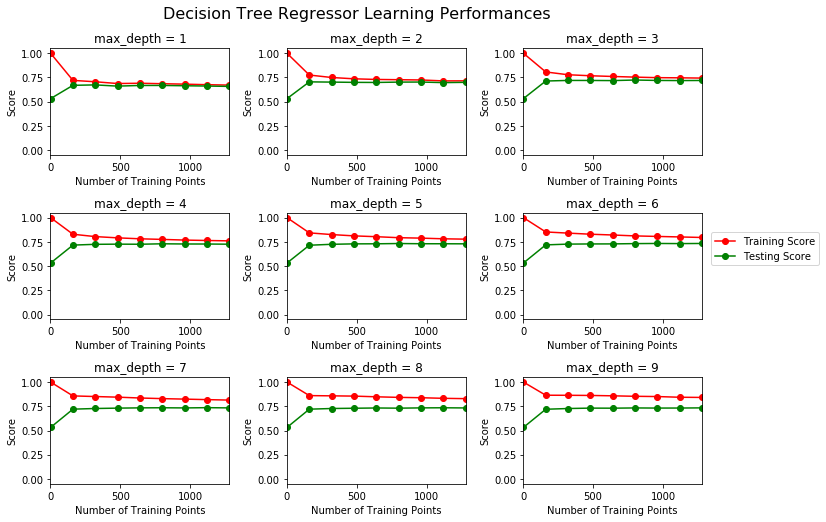

In [6]:
# Produce learning curves for varying training set sizes and maximum depths
depth_arr = np.arange(1, 10, 1)
vs.ModelLearning(X_train, Y_train, depth_arr)

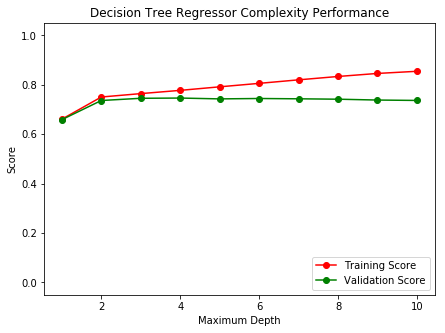

In [7]:
vs.ModelComplexity(X_train, Y_train)

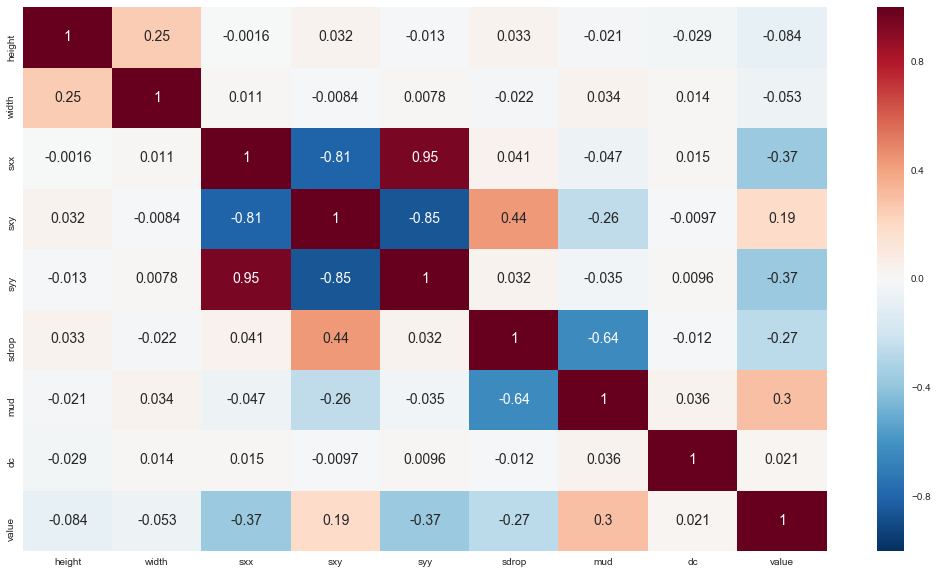

In [8]:
plt.figure(figsize=(18, 10))
plt.rcParams.update({'font.size': 14})
sns.heatmap(df_train.corr(), annot = True)
plt.savefig('corr_heat_map.eps')

In [5]:
# %matplotlib inline
# # columns= ['height', 'width', 'sxx', 'sxy', 'syy', 'sdrop', 'mud', 'dc', 'value']
# # sns.pairplot(df_train, diag_kind="hist", markers="+")


# pd.plotting.scatter_matrix(df_train, alpha = 0.3, figsize = (14,8), diagonal = 'kde');
# plt.savefig('pairplot.eps')

# for i in range(len(columns)):
#     for j in range(len(columns)):
#         kk = 1
#         plt.subplot(4, 4, kk)
#         plt.scatter(df_train[columns[i]], df_train[columns[j]])
#         kk = kk+1
# plt.show()

In [10]:
# plt.figure(figsize=(20, 5))
# for i, feature in enumerate(df_train.columns):
#     plt.subplot(1, 11, i+1)
#     df_train[feature].plot(kind='hist')
#     plt.xlabel(feature)

### Class Imabalance 

In [6]:
label_count = df_train.groupby('label', as_index = False).count()
class_name = ['Rupture arrest', 'Rupture propagate']
count = list(label_count['height'])
print('Rupture propagate : {}, \nRupture arrest: {}'.format(count[0], count[1]))
print('Total number of data: {}'.format(np.sum(count)))
print('Class ratio for rupture propagation: {}'.format(count[0]/count[1]))

Rupture propagate : 1041, 
Rupture arrest: 559
Total number of data: 1600
Class ratio for rupture propagation: 1.8622540250447228


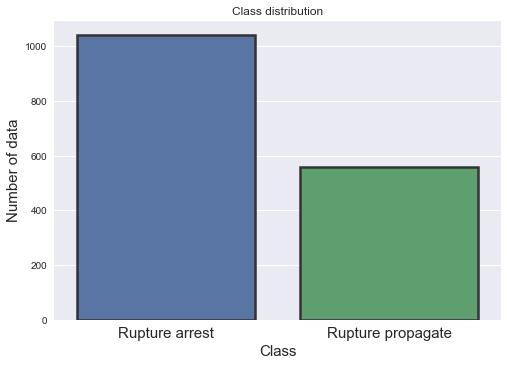

In [7]:
index = np.arange(len(class_name))
# plt.bar(class_name, count)
sns.barplot(x = class_name, y = count, linewidth = 2.5, errcolor = ".2", edgecolor = ".2")
plt.xlabel('Class', fontsize=15)
plt.ylabel('Number of data', fontsize=15)
plt.xticks(index, class_name, fontsize=15)
plt.title('Class distribution')
plt.show()

In [8]:
POS_CLASS_RATIO = count[0]/count[1]
aa = class_weight.compute_class_weight('balanced', np.unique(Y_train.astype(int)), Y_train.astype(int))
CLASS_WEIGHT = {0 : aa[0] , 1: aa[1]}

In [9]:
CLASS_WEIGHT

{0: 0.7684918347742555, 1: 1.4311270125223614}

## Find best parameters using GridSearchCV and fit the model

In [15]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=random_state)
rfc = RandomForestClassifier(criterion='entropy', random_state = random_state, class_weight='balanced')
params = {
    'n_estimators': [10, 20, 50, 100],
    'max_depth': [3, 4, 5, 7, 10],
    'min_samples_split': [40, 50, 60, 70]
}

grid_clf = GridSearchCV(estimator = rfc, param_grid = params, scoring = 'accuracy', cv = cv)

# we have to find out best optimized parameters
grid_clf.fit(X_train, Y_train.astype(int))

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=6, shuffle=True),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=6,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 20, 50, 100], 'max_depth': [3, 4, 5, 7, 10], 'min_samples_split': [40, 50, 60, 70]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

## Print the best parameters and model estimator

In [16]:
# get the best model
print('\n # Best estimator ---------\n{}'.format(grid_clf.best_estimator_))

# Get the best parameters
print('\n # Best parameters ---------\n{}'.format(grid_clf.best_params_))

# best score
print('\n # Best score ---------\n{}'.format(grid_clf.best_score_))


 # Best estimator ---------
RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=10, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=40, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=1, oob_score=False, random_state=6,
            verbose=0, warm_start=False)

 # Best parameters ---------
{'max_depth': 10, 'min_samples_split': 40, 'n_estimators': 20}

 # Best score ---------
0.746875


## Prediction on the estimator with the best found parameters.

In [17]:
Y_pred = grid_clf.predict(X_test)

In [18]:
X_test[:1]

array([[ 0.24334709, -1.65306667,  1.26846936, -1.25599254,  1.30940925,
        -1.28347531,  2.07594133, -0.26242996]])

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print('The accuracy of the model is {}'.format(accuracy_score(Y_test, Y_pred)))
print('# Classification report \n {}'.format(classification_report(Y_test, Y_pred)))

The accuracy of the model is 0.8125
# Classification report 
              precision    recall  f1-score   support

        0.0       0.90      0.81      0.85       272
        1.0       0.67      0.81      0.73       128

avg / total       0.83      0.81      0.82       400



### Confusion matrix

In [20]:
confusion_matrix(Y_pred, Y_test)

array([[221,  24],
       [ 51, 104]])

### Get the important features

In [21]:
model = RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=5, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=random_state, verbose=0, warm_start=False)

model.fit(X_train, Y_train.astype(int))
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

length = len(list(df_train))
features= list(df_train)[:length-1]

# Print the feature ranking
print("Feature ranking:")

features_rank =[]
label_name = []
for f in range(X_train.shape[1]):
    features_rank.append(importances[indices[f]])
    label_name.append(features[indices[f]])
    print("{}. Feature {} ({}%)".format(f + 1, features[indices[f]], round(importances[indices[f]]*100, 2)))


Feature ranking:
1. Feature sxx (21.34%)
2. Feature mud (18.8%)
3. Feature syy (15.88%)
4. Feature sdrop (15.59%)
5. Feature sxy (14.39%)
6. Feature height (6.07%)
7. Feature width (4.09%)
8. Feature dc (3.83%)


/usr/local/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/usr/local/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/usr/local/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/usr/local/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/usr/local/lib/python3.6/site-packages/s

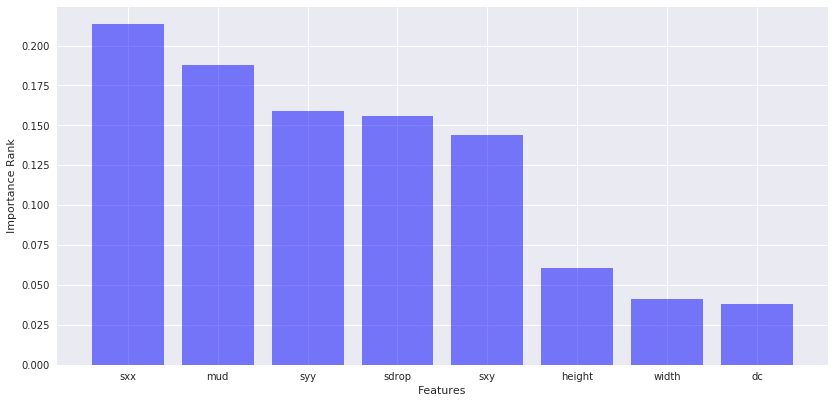

In [22]:
font = {'family' : 'normal',
        'weight' : 'regular',
        'size'   : 20}

plt.rc('font', **font)

y_pos = np.arange(len(features_rank))
performance = features_rank

plt.figure(figsize=(12, 6))
plt.bar(y_pos, performance, align='center', alpha=0.5, color='b')
plt.xticks(y_pos, label_name)
plt.ylabel('Importance Rank')
plt.xlabel('Features')
plt.tight_layout()
plt.savefig('rf_important_features.eps')

In [24]:
# import pydotplus
# from sklearn.tree import export_graphviz
# import six, os
# dotfile = six.StringIO()
# i_tree = 0
# for tree_in_forest in model.estimators_:
#     if (i_tree <1):        
#         export_graphviz(tree_in_forest, out_file = 'dot_data',\
#                 feature_names=df_train.columns, filled=True, rounded=True)
#         os.system('dot -Tpng tree.dot -o tree.png')
# #         pydotplus.graph_from_dot_data(dotfile.getvalue()).write_png('dtree'+ str(i_tree) +'.png')
#         i_tree = i_tree + 1

# os.system('dot -Tpng tree.dot -o random_forest_tree.ai')

In [25]:
# Pickle the model on disk 
import pickle
file = open('rupture_random_forest.pkl', 'wb')
pickle.dump(grid_clf, file)
file.close()

In [26]:
# open pickle
import pickle
file = open('rupture_random_forest.pkl', 'rb')
model = pickle.load(file)

In [27]:

Y_pred = model.predict(X_test)
print('The accuracy of the model is {}'.format(accuracy_score(Y_test, Y_pred)))
print('# Classification report \n {}'.format(classification_report(Y_test, Y_pred)))

The accuracy of the model is 0.8125
# Classification report 
              precision    recall  f1-score   support

        0.0       0.90      0.81      0.85       272
        1.0       0.67      0.81      0.73       128

avg / total       0.83      0.81      0.82       400

